In [1]:
#importing dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
#importing models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR

In [3]:
#importing dataset
sales_data = pd.read_csv("big_mart_data.csv")

In [4]:
#first five rows
sales_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
#number of data points and features
sales_data.shape

(8523, 12)

In [6]:
#statistical information of columns
sales_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [7]:
#information of columns
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


### Categorical features
- item_identifier
- item_fat_content
- item_type
- outlet_identifier
- outlet_size
- outlet_location_type
- outlet_type

In [8]:
#checking missing values
sales_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

## handling missing values
- using imputation(mean and mode)

### item_weight

In [9]:
#mean value
mean_value = sales_data["Item_Weight"].mean()

In [10]:
#filling the missing values with mean value
sales_data["Item_Weight"].fillna(mean_value, inplace=True)

In [11]:
#checking if the value is imputed
sales_data["Item_Weight"].isnull().sum()

0

### outlet_size

In [12]:
sales_data["Outlet_Size"].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [13]:
mode_of_outlet_size = sales_data.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x:x.mode()[0]))

In [14]:
print(mode_of_outlet_size )

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [15]:
missing_values = sales_data["Outlet_Size"].isnull()

In [16]:
sales_data.loc[missing_values, "Outlet_Size"] = sales_data.loc[missing_values, "Outlet_Type"].apply(lambda x: mode_of_outlet_size[x])

In [17]:
sales_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

## Data Analysis

### Numerical features

In [18]:
sns.set()

In [19]:
#item_weight distribution

<Figure size 600x600 with 0 Axes>

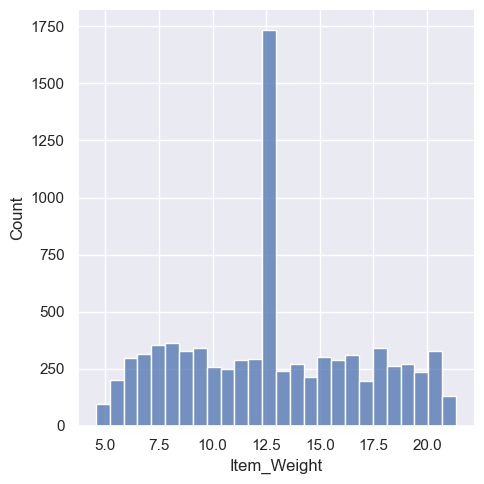

In [20]:
plt.figure(figsize = (6,6))
sns.displot(sales_data["Item_Weight"])
plt.show()

<Figure size 600x600 with 0 Axes>

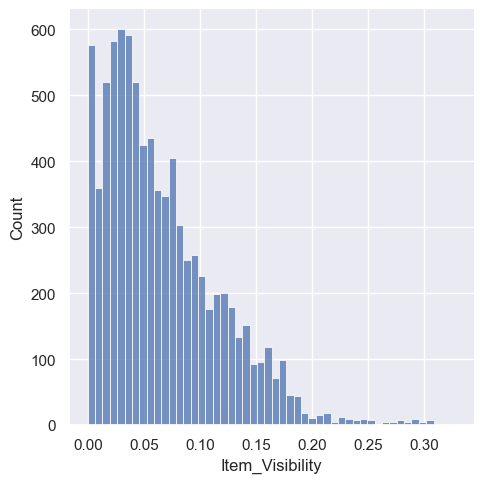

In [21]:
# Item_visibility distribution
plt.figure(figsize = (6,6))
sns.displot(sales_data["Item_Visibility"])
plt.show()

<Figure size 600x600 with 0 Axes>

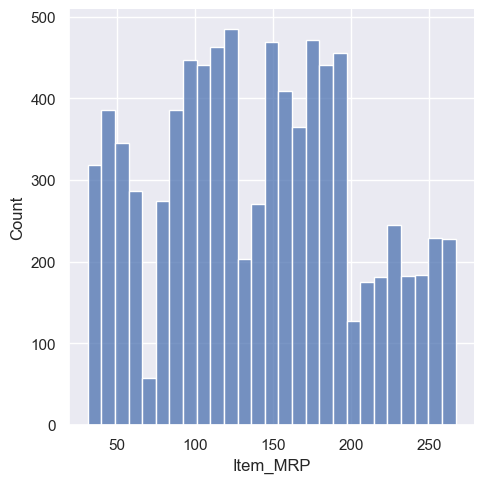

In [22]:
#Item_MRP distribution
plt.figure(figsize=(6,6))
sns.displot(sales_data["Item_MRP"])
plt.show()

<Figure size 600x600 with 0 Axes>

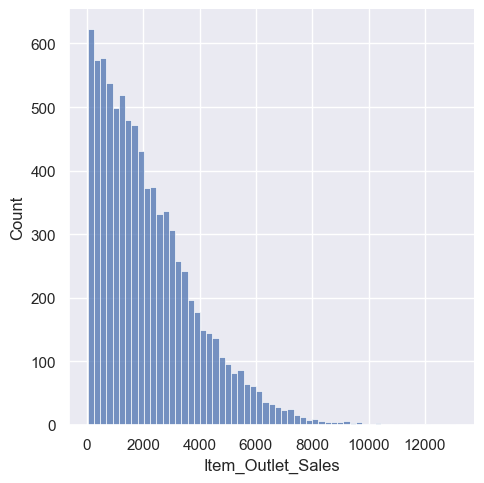

In [23]:
#Item_Outlet_Sales
plt.figure(figsize=(6,6))
sns.displot(sales_data["Item_Outlet_Sales"])
plt.show()

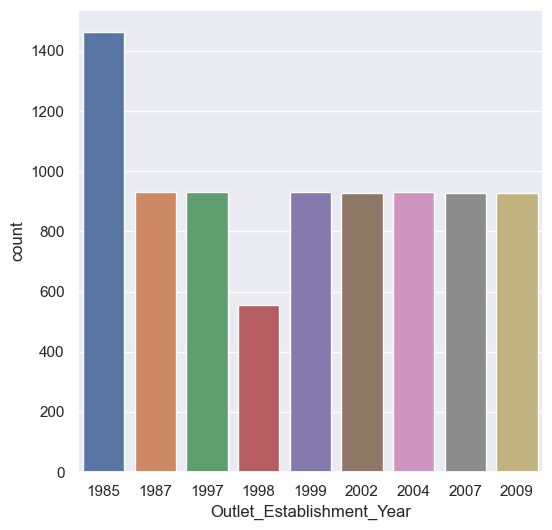

In [24]:
#Outlet_Establishment_Year 
plt.figure(figsize=(6,6))
sns.countplot(x= "Outlet_Establishment_Year", data = sales_data)
plt.show()

## Categorical Features

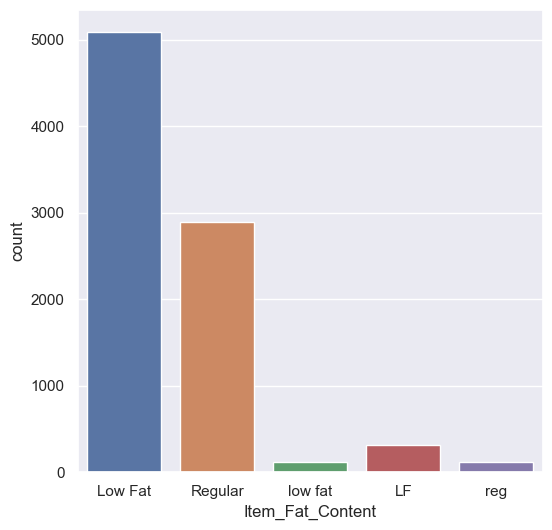

In [25]:
#Item_Fat_content 
plt.figure(figsize=(6,6))
sns.countplot(x= "Item_Fat_Content", data = sales_data)
plt.show()

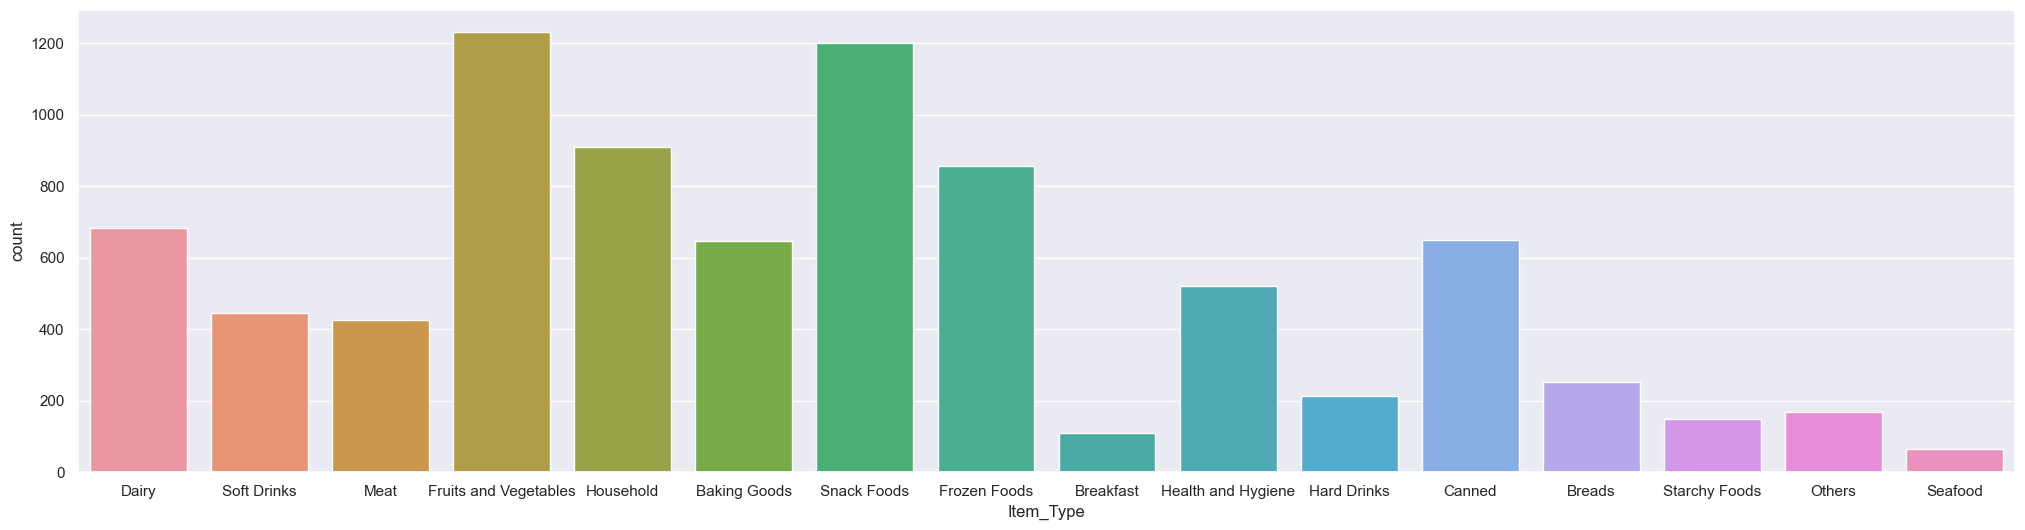

In [26]:
#Item_Type
plt.figure(figsize=(25,6))
sns.countplot(x= "Item_Type", data = sales_data)
plt.show()

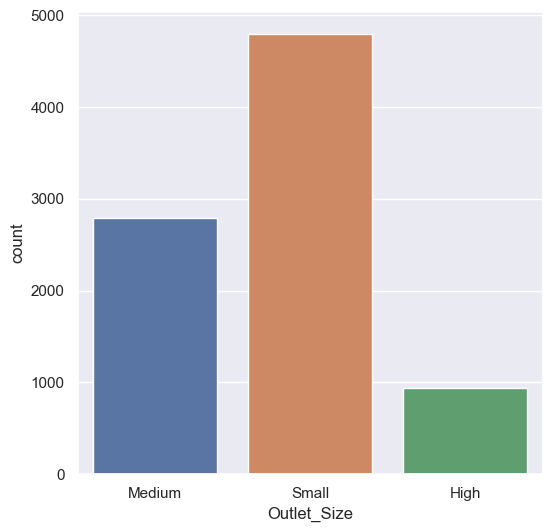

In [27]:
#Outlet_Size
plt.figure(figsize=(6,6))
sns.countplot(x= "Outlet_Size", data = sales_data)
plt.show()

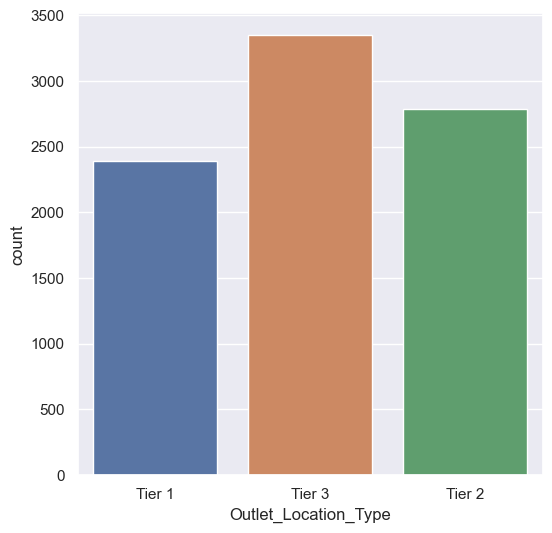

In [28]:
#Outlet_Location_Type
plt.figure(figsize=(6,6))
sns.countplot(x= "Outlet_Location_Type", data = sales_data)
plt.show()

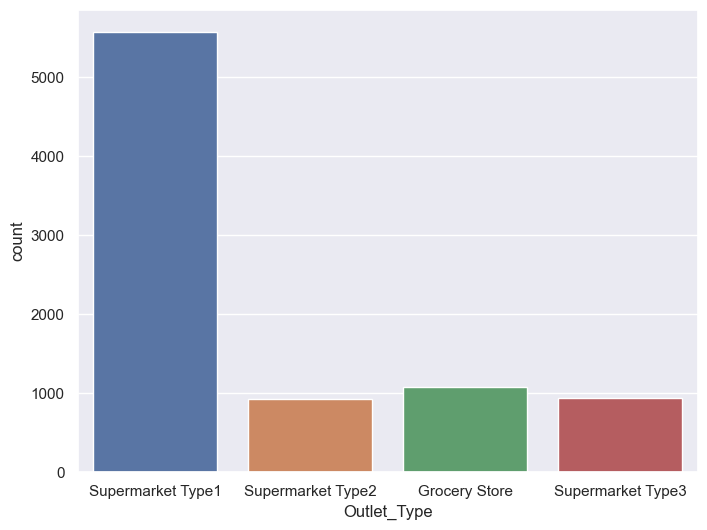

In [29]:
#Outlet_Type
plt.figure(figsize=(8,6))
sns.countplot(x= "Outlet_Type", data = sales_data)
plt.show()

## Data Preprocessing

In [30]:
sales_data["Item_Fat_Content"].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [31]:
sales_data.replace({"Item_Fat_Content":{"low fat":"Low Fat", "LF":"Low Fat", "reg":"Regular"}}, inplace=True)

In [32]:
sales_data["Item_Fat_Content"].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

### Label Encoding

In [33]:
encoder = LabelEncoder()

In [34]:
sales_data["Item_Identifier"] = encoder.fit_transform(sales_data["Item_Identifier"])
sales_data["Item_Fat_Content"] = encoder.fit_transform(sales_data["Item_Fat_Content"])
sales_data["Item_Type"] = encoder.fit_transform(sales_data["Item_Type"])
sales_data["Outlet_Identifier"] = encoder.fit_transform(sales_data["Outlet_Identifier"])
sales_data["Outlet_Size"] = encoder.fit_transform(sales_data["Outlet_Size"])
sales_data["Outlet_Location_Type"] = encoder.fit_transform(sales_data["Outlet_Location_Type"])
sales_data["Outlet_Type"] = encoder.fit_transform(sales_data["Outlet_Type"])

In [64]:
sales_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


### handling unsclaed data

In [36]:
# unscaled_data = sales_data[["Item_Identifier", "Item_Weight", "Item_Visibility", "Item_MRP"]]

In [37]:
# scaler = StandardScaler()

In [38]:
# scaled_data = scaler.fit_transform(unscaled_data)

In [39]:
# scaled_data[:,0].shape

In [40]:
# sales_data["Item_Identifier"] = scaled_data[:,0]
# sales_data["Item_Weight"] = scaled_data[:,1]
# sales_data["Item_Visibility"] = scaled_data[:,2]
# sales_data["Item_MRP"] = scaled_data[:,3]

In [65]:
sales_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [42]:
X = sales_data.drop("Item_Outlet_Sales", axis = 1)
Y = sales_data["Item_Outlet_Sales"]

In [43]:
# models = [LinearRegression(), XGBRegressor(), SVR()]
# params ={
#     'lr':{
#         "fit_intercept": [True, False],
#         'n_jobs': [1, 3, 5, 7]
                  
#     },
#     "xg":{
#         'learning_rate' : [0.01, 0.05,0.50,1],
#         'max_depth'    : [4,6,8]
#     },
#     'svr':{
#         'kernel': ('linear', 'rbf','poly'), 
#         'C':[1.5, 10]
#     }
# }        

In [44]:
# model_key = list(params.keys())

In [45]:
# def model_hyperparams(models, params):
#     for key, model in enumerate(models):
#         reg = GridSearchCV(model, params[model_key[key]], cv=2)
#         reg.fit(X,Y)
#         print(model)
#         print('best_estimators', reg.best_estimator_)

In [46]:
# model_hyperparams(models, params)

In [47]:
models = [LinearRegression(fit_intercept=False, n_jobs=1), XGBRegressor(base_score=0.5, booster='gbtree', predictor='auto'), SVR(C=10, kernel='linear')]
def models_cv(models):
    for model in models:
        cv_score = cross_val_score(model, X, Y, cv=5)
        print(cv_score)
        mean_cv_score = round((sum(cv_score)/len(cv_score)*100), 2)
        print("Mean CV Score of", model, "is ", mean_cv_score)
        print("--------------------------------------------")

In [48]:
models_cv(models)

[0.51822647 0.50404597 0.48375993 0.50205501 0.49987247]
Mean CV Score of LinearRegression(fit_intercept=False, n_jobs=1) is  50.16
--------------------------------------------
[0.53606739 0.52135838 0.48878925 0.52901353 0.54057234]
Mean CV Score of XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor='auto', random_state=None, ...) is 

In [50]:
#splitting the train and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print(X.shape, X_train.shape, X_test.shape)

(8523, 11) (6818, 11) (1705, 11)


In [129]:
regressor = XGBRegressor(max_depth=2)
regressor.fit(X_train, Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=2, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [130]:
y_pred = regressor.predict(X_test)

In [131]:
mse = mean_squared_error(Y_test, y_pred)
rmse = np.sqrt(mse)
print("MSE:", mse)
print("RMSE:", rmse)

MSE: 1202114.7195460605
RMSE: 1096.4099231337066


In [132]:
#accuracy on training set
train_pred = regressor.predict(X_train)
mse = mean_squared_error(Y_train, train_pred)
rmse = np.sqrt(mse)
print("MSE:", mse)
print("RMSE:", rmse)

MSE: 1052882.7191111022
RMSE: 1026.100735362324


In [133]:
from sklearn.metrics import r2_score
r2_score(Y_test, y_pred)

0.5892817065821083

In [134]:
r2_score(Y_train, train_pred)

0.637936690070481